# Test Analysis

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
# Return an array containing the corresponding data of the xml file

def parseData(path): 
    with open(path) as f:
        lines = f.readlines()

    # Creates Array's of Data
    parsedData = [data.split(',') for data in lines]
    # Parse the Needed Properties 
    parsedData = [[int(data) if j in [0,1,9,10,14,15] and i > 0 else data for j, data in enumerate(line) ] for i, line in enumerate(parsedData)]
    # Fix Last Column Name and Last Data Value
    for i, line in enumerate(parsedData):
        value = line[-1]
        parsedData[i][-1] = value[:len(value)-1]
    
    return parsedData

In [153]:
# Returns a pandas DataFrame based on an Array (data)

def parseArrayToDataFrame(data,  hasTitles = False, exclude = []):
    if hasTitles:
        columns = data[0]
        data = data[1:]
        data = list(zip(*data))

        data = {column_name: data[i] for i, column_name in enumerate(columns) if column_name not in exclude}

    return pd.DataFrame(data)

In [201]:
# Columns to be excluded
exclude = ['label', 'responseMessage', 'threadName','dataType', 'failureMessage', 'grpThreads', 'allThreads', 'URL']
# File Path's
#   HP Web Tours
#       Sign Up
signUpMetadataPath = './User SignUp/Metadata/SignUp.xml'
formsMetadataPath = './User SignUp/Metadata/Form.xml'
formsContinueMetadataPath = './User SignUp/Metadata/Form Continue.xml'
signUpLogOutMetadataPath = './User SignUp/Metadata/LogOut.xml'
testSignUpMetadataPath = './User SignUp/Metadata/Test.xml'
#       Log In
signInMetadataPath = './User Login/Metadata/signIn.xml'
signInLogOutMetadataPath = './User Login/Metadata/LogOut.xml'
testSignInMetadataPath = './User Login/Metadata/Test.xml'

#   Blaze
flightsMetadataPath = './BlazeDemo/Metadata/Flow - Flights.xml'
reservesMetadataPath = './BlazeDemo/Metadata/Flow - Reserve.xml'


In [206]:
# Hp - Sign Up
signUpMetadata = np.array(parseData(signUpMetadataPath))
signUp_df = parseArrayToDataFrame(signUpMetadata, True, exclude)

formsMetadata = np.array(parseData(formsMetadataPath))
forms_df = parseArrayToDataFrame(formsMetadata, True, exclude)

formsContinueMetadata = np.array(parseData(formsContinueMetadataPath))
formsContinue_df = parseArrayToDataFrame(formsContinueMetadata, True, exclude)

signUpLogOutMetadata = np.array(parseData(signUpLogOutMetadataPath))
signUpLogOut_df = parseArrayToDataFrame(signUpLogOutMetadata, True, exclude)

testSignUpMetadata = np.array(parseData(testSignUpMetadataPath))
testSignUp_df = parseArrayToDataFrame(testSignUpMetadata, True, exclude)

# Hp - Sign In
signInMetadata = np.array(parseData(signInMetadataPath))
signIn_df = parseArrayToDataFrame(signInMetadata, True, exclude)

signInLogOutMetadata = np.array(parseData(signInLogOutMetadataPath))
signInLogOut_df = parseArrayToDataFrame(signInLogOutMetadata, True, exclude)

testSignInMetadata = np.array(parseData(testSignInMetadataPath))
testSignIn_df = parseArrayToDataFrame(testSignInMetadata, True, exclude)

# Blaze
flightsMetadata = np.array(parseData(flightsMetadataPath))
flights_df = parseArrayToDataFrame(flightsMetadata, True, exclude)

reservesMetadata = np.array(parseData(reservesMetadataPath))
reserves_df = parseArrayToDataFrame(reservesMetadata, True, exclude)


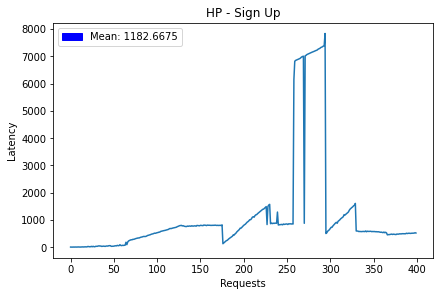

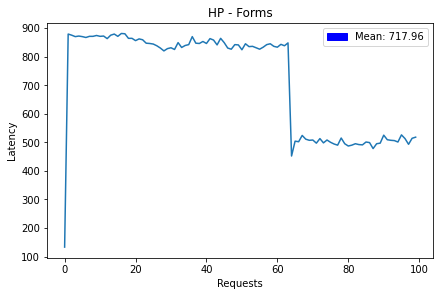

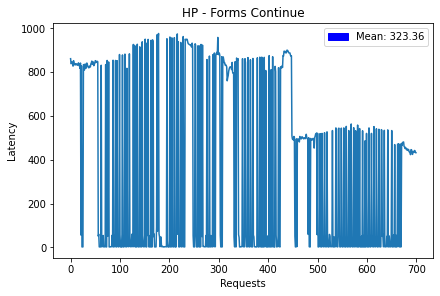

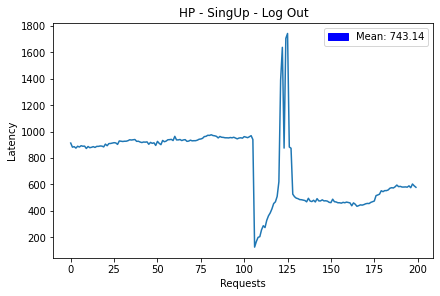

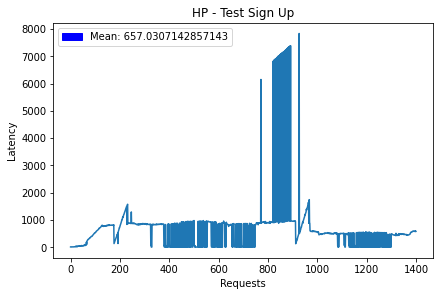

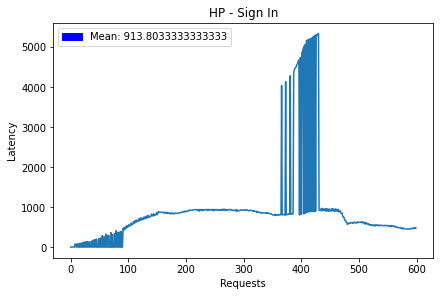

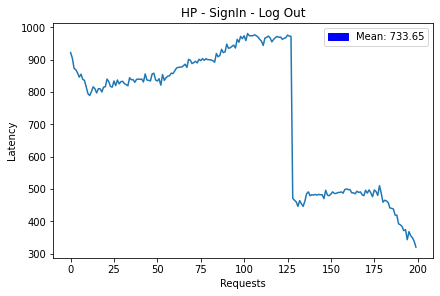

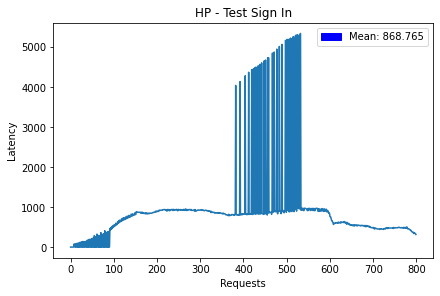

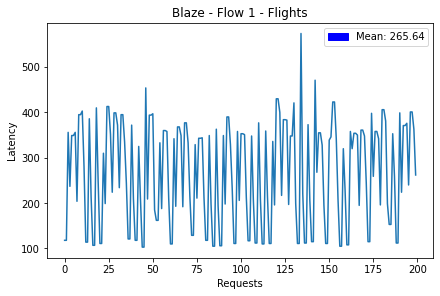

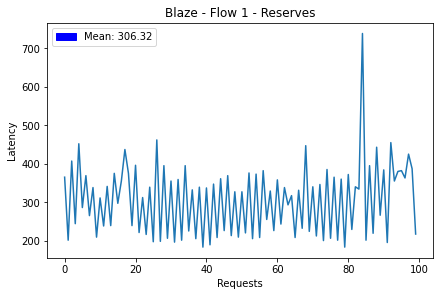

In [207]:
import matplotlib.patches as mpatches

testsMetadata = [('HP - Sign Up', signUp_df), ('HP - Forms', forms_df), ('HP - Forms Continue', formsContinue_df), ('HP - SingUp - Log Out', signUpLogOut_df), ('HP - Test Sign Up', testSignUp_df), ('HP - Sign In', signIn_df), ('HP - SignIn - Log Out', signInLogOut_df), ('HP - Test Sign In', testSignIn_df), ('Blaze - Flow 1 - Flights', flights_df), ('Blaze - Flow 1 - Reserves', reserves_df)]


for title, metadata in testsMetadata:
    fig, ax = plt.subplots(layout='constrained')
    latency_data = metadata['Latency'].astype(int)
    requests = latency_data.index
    mean = np.mean(latency_data)
    ax.set_title(title)
    ax.set_xlabel('Requests')
    ax.set_ylabel('Latency')
    ax.plot(requests , latency_data)
    legend = mpatches.Patch(color='blue', label=f'Mean: {mean}')
    ax.legend(handles=[legend])

In [197]:
# Sign Up Credentials
with open('./User SignUp/SignUp - Credentials.txt', 'w') as f:
    for i in range(101):
        text = f'{i},username{i},pass,pass,first,last,street,city'
        f.write(text)
        f.write('\n')

# Log In Credential
with open('./User LogIn/LogIn - Credentials.txt', 'w') as f:
    for i in range(101):
        text = f'{i},username{i},pass'
        f.write(text)
        f.write('\n')